## CHEMOUT Spectrum Identification

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import find_peaks

* Data import:

In [4]:
# Directory where the data files are located
directory = "CHEMOUT"
    
# Get the list of files in the CHEMOUT directory
files = os.listdir(directory)

In [5]:
files

['WB89-640_23A003.final.Tmb.dat',
 'WB89-315_23A003.final.Tmb.dat',
 'WB89-440_23A003.final.Tmb.dat',
 '19571+3113_23A003.final.Tmb.dat',
 'WB89-076_23A003.final.Tmb.dat',
 'WB89-006_23A003.final.Tmb.dat',
 'WB89-380_23A003.final.Tmb.dat',
 'WB89-399_23A003.final.Tmb.dat',
 'WB89-705_23A003.final.Tmb.dat',
 'WB89-379_23A003.final.Tmb.dat',
 'WB89-529_23A003.final.Tmb.dat',
 'WB89-083_23A003.final.Tmb.dat',
 'WB89-621_23A003.final.Tmb.dat',
 'WB89-288_23A003.final.Tmb.dat',
 'WB89-898_23A003.final.Tmb.dat',
 'WB89-501_23A003.final.Tmb.dat',
 'WB89-035_23A003.final.Tmb.dat',
 'WB89-080_23A003.final.Tmb.dat',
 '20243+3853_23A003.final.Tmb.dat',
 'WB89-572_23A003.final.Tmb.dat',
 'WB89-014_23A003.final.Tmb.dat',
 'WB89-152_23A003.final.Tmb.dat',
 '19489+3030_23A003.final.Tmb.dat',
 'WB89-793_23A003.final.Tmb.dat',
 '19383+2711_23A003.final.Tmb.dat',
 'WB89-002_23A003.final.Tmb.dat',
 'WB89-789_23A003.final.Tmb.dat',
 'WB89-060_23A003.final.Tmb.dat',
 'WB89-670_23A003.final.Tmb.dat',
 'WB89

In [6]:
# Create a dictionary to store the arrays
freq_array={}
int_array={}

In [7]:
# Use tqdm to show progress
with tqdm(total=len(files), desc="Progress") as pbar:
    # Iterate over each file
    for file_name in files:
        # Increment the progress bar
        pbar.update(1)

        # Build the full path to the file
        file_path = os.path.join(directory, file_name)
        
        # Read the data from the file
        with open(file_path, 'r') as infile:
            # Read all the lines in the file
            lines = infile.readlines()
        
        frequency = []
        line_intensity = []
        
        # Process each line in the file
        for line in lines:
            cols = line.split()
            if len(cols) == 2:  # Ensure there are two data columns in the line
                frequency.append(float(cols[0]))
                line_intensity.append(float(cols[1]))
        
        frequency_array = np.array(frequency)
        line_intensity_array = np.array(line_intensity)
        
        # Get the file name without the extension
        file_name_without_extension = os.path.splitext(file_name)[0]
        
        # Store the arrays in the dictionary
        freq_array[file_name_without_extension]= frequency_array
        int_array[file_name_without_extension]= line_intensity_array

print("All arrays have been generated and stored in  their corresponding dictionary.")

Progress: 100%|█████████████████████████████████| 35/35 [00:16<00:00,  2.13it/s]

All arrays have been generated and stored in  their corresponding dictionary.


In [8]:
# Let's see the generated arrays

freq_array

{'WB89-640_23A003.final.Tmb': array([31524.6505, 31524.6886, 31524.7268, ..., 49975.3507, 49975.3889,
        49975.427 ]),
 'WB89-315_23A003.final.Tmb': array([31527.1578, 31527.1959, 31527.2341, ..., 49972.0936, 49972.1317,
        49972.1699]),
 'WB89-440_23A003.final.Tmb': array([31526.2823, 31526.3204, 31526.3586, ..., 49973.231 , 49973.2691,
        49973.3072]),
 '19571+3113_23A003.final.Tmb': array([31527.0809, 31527.119 , 31527.1571, ..., 49972.1935, 49972.2317,
        49972.2698]),
 'WB89-076_23A003.final.Tmb': array([31527.639 , 31527.6771, 31527.7153, ..., 49971.4685, 49971.5066,
        49971.5448]),
 'WB89-006_23A003.final.Tmb': array([31527.6552, 31527.6933, 31527.7315, ..., 49971.4474, 49971.4856,
        49971.5237]),
 'WB89-380_23A003.final.Tmb': array([31526.8393, 31526.8775, 31526.9156, ..., 49972.5073, 49972.5455,
        49972.5836]),
 'WB89-399_23A003.final.Tmb': array([31526.6509, 31526.689 , 31526.7272, ..., 49972.7521, 49972.7902,
        49972.8284]),
 'WB89

In [9]:
int_array

{'WB89-640_23A003.final.Tmb': array([ 0.01389  ,  0.01138  , -0.0021507, ...,  0.027257 ,  0.052178 ,
         0.049939 ]),
 'WB89-315_23A003.final.Tmb': array([-0.021311, -0.030808, -0.04579 , ..., -0.093796, -0.0894  ,
        -0.08478 ]),
 'WB89-440_23A003.final.Tmb': array([0.00035027, 0.00015103, 0.0031446 , ..., 0.017778  , 0.035566  ,
        0.037615  ]),
 '19571+3113_23A003.final.Tmb': array([-0.010053 , -0.0093493, -0.0073176, ...,  0.03007  , -0.014696 ,
        -0.018068 ]),
 'WB89-076_23A003.final.Tmb': array([-0.013663 , -0.0056397,  0.012005 , ...,  0.03208  ,  0.014801 ,
         0.017804 ]),
 'WB89-006_23A003.final.Tmb': array([ 0.013193  , -0.00053984, -0.016075  , ..., -0.036157  ,
        -0.0082523 ,  0.020537  ]),
 'WB89-380_23A003.final.Tmb': array([-0.018917 , -0.0009644, -0.021745 , ..., -0.035884 , -0.04719  ,
        -0.012471 ]),
 'WB89-399_23A003.final.Tmb': array([-0.001898 , -0.0073398,  0.0021585, ..., -0.0082234,  0.0030304,
         0.025555 ]),
 'WB89

* Data Selection:

In [99]:
# Now we select the spectrum that we want to plot

# name="WB89-640_23A003.final.Tmb" X
# name='WB89-315_23A003.final.Tmb' X
# name='WB89-440_23A003.final.Tmb' X
# name='19571+3113_23A003.final.Tmb' X
# name='WB89-076_23A003.final.Tmb' X
# name='WB89-006_23A003.final.Tmb' X
# name='WB89-380_23A003.final.Tmb' X
# name='WB89-399_23A003.final.Tmb' X
# name='WB89-705_23A003.final.Tmb' X
# name='WB89-379_23A003.final.Tmb' X
# name='WB89-529_23A003.final.Tmb' X
# name='WB89-083_23A003.final.Tmb' X
# name='WB89-621_23A003.final.Tmb' X
# name='WB89-288_23A003.final.Tmb'X
name='WB89-898_23A003.final.Tmb'
# name='WB89-501_23A003.final.Tmb' X
# name='WB89-035_23A003.final.Tmb' X
# name='WB89-080_23A003.final.Tmb' X
# name='20243+3853_23A003.final.Tmb' X
# name='WB89-572_23A003.final.Tmb' X
# name='WB89-014_23A003.final.Tmb' X
# name='WB89-152_23A003.final.Tmb' X
# name='19489+3030_23A003.final.Tmb' X
# name='WB89-793_23A003.final.Tmb' X
# name='19383+2711_23A003.final.Tmb' X
# name='WB89-002_23A003.final.Tmb' X
# name='WB89-789_23A003.final.Tmb' X
# name='WB89-060_23A003.final.Tmb' X
# name='WB89-670_23A003.final.Tmb' X
# name='WB89-283_23A003.final.Tmb' X
# name='WB89-031_23A003.final.Tmb' X
# name='WB89-040_23A003.final.Tmb' X
# name='WB89-391_23A003.final.Tmb' X
# name='19423+2541_23A003.final.Tmb' X
# name='WB89-437_23A003.final.Tmb' X

* Graphs and identification:

In [100]:
# Window size

window_size = 5

def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

int_array_smooth = smooth_data(int_array[name], window_size)

In [101]:
# Convert MHz to GHz  (1000 MHz= 1 GHz)

frequency_array_ghz=freq_array[name]/1000

Text(0.5, 1.0, 'WB89-898_23A003.final.Tmb')

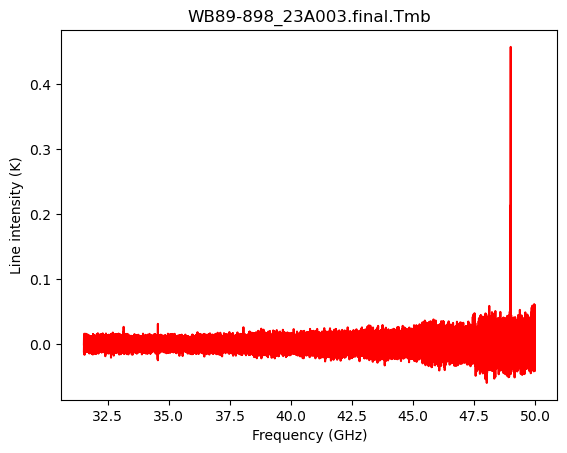

In [102]:
# And we plot it

plt.plot(frequency_array_ghz, int_array_smooth, ls="-", color="red")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Line intensity (K)")
plt.title(f"{name}")

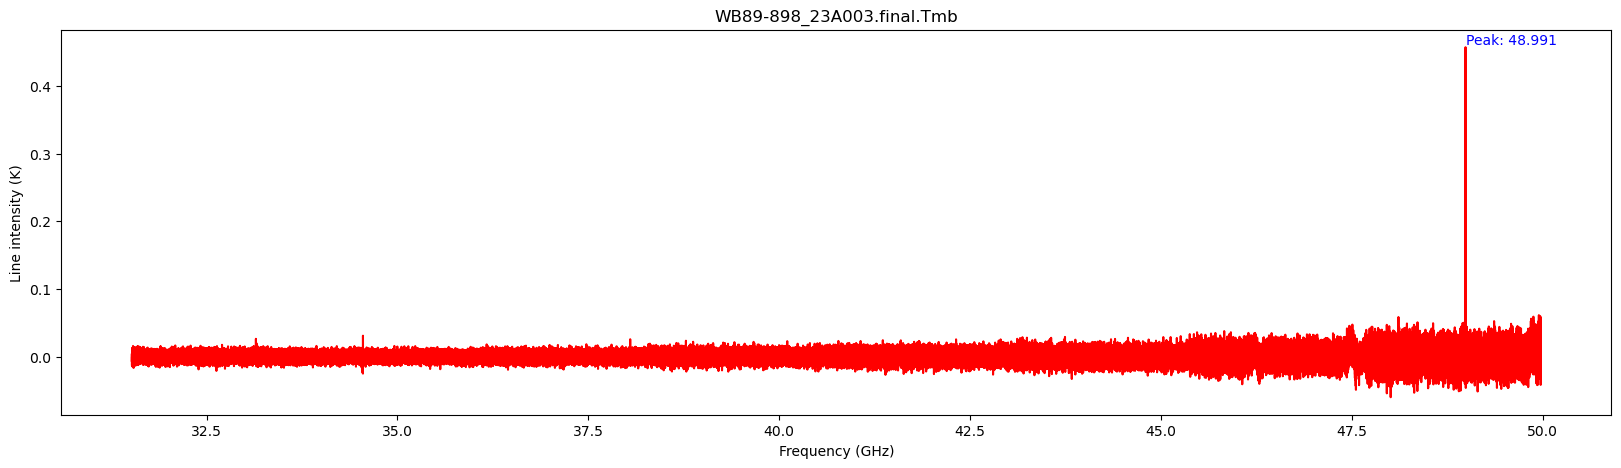

In [103]:
plt.figure(figsize=(20, 5))

peaks, _ = find_peaks(int_array_smooth, height=0.078)

plt.plot(frequency_array_ghz, int_array_smooth, ls="-", color="red")

list_freq = []

for peak_index in peaks:
    frequency_of_peak = frequency_array_ghz[peak_index]
    intensity_of_peak = int_array_smooth[peak_index]
    list_freq.append(frequency_of_peak)
    plt.text(frequency_of_peak, intensity_of_peak, f'Peak: {frequency_of_peak:.3f}', color='blue', fontsize=10, ha='left', va='bottom')

plt.xlabel("Frequency (GHz)")
plt.ylabel("Line intensity (K)")
plt.title(f"{name}")
plt.show()

In [104]:
# Then, we identify the peaks

print(f"Peaks:{peaks},Freq:{list_freq}")

Peaks:[457775],Freq:[48.990944000000006]


In [94]:
list_intensity_peak

[0.1259966, 0.1499, 1.1386]

In [97]:
np.where(list_freq== 47.5667909)

(array([], dtype=int64),)

In [78]:
np.where(np.isclose(list_freq, 45.490 , atol=1e-9))

(array([72]),)

In [36]:
peaks[41]

457809

In [81]:
peaks[np.where(np.isclose(list_freq, 48.991 , atol=1e-9))]

array([457937])

In [18]:
 #r"$C^{34}S$", r"$CH_3OH$", r"$C^{34}S$"   r"$C_4H$", r"$HC_3N$",

In [19]:
name

'WB89-315_23A003.final.Tmb'

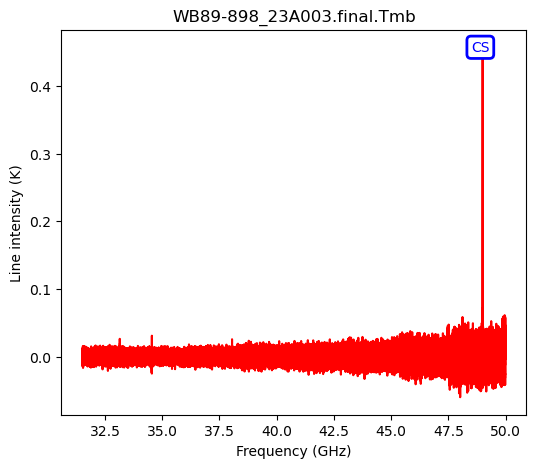

In [105]:
plt.figure(figsize=(6, 5))

peaks, _ = find_peaks(int_array_smooth, height=0.075) 

custom_labels = { # Change the labels with the desired chemical species
    457775: "CS"
}

# Dictionary to hold custom xytext for each label
custom_xytext = {
    457775: (5,5)
}

list_freq_of_peak=[]

list_intensity_peak=[]

for peak_index in peaks:
    frequency_of_peak = frequency_array_ghz[peak_index]
    list_freq_of_peak.append(frequency_of_peak)

    intensity_of_peak = int_array_smooth[peak_index]
    list_intensity_peak.append(intensity_of_peak)
    
    label = custom_labels.get(peak_index) 
    
    # Set default xytext and then overwrite if a custom one exists
    xytext = custom_xytext.get(peak_index, (5, 5))  # Default is (5, 5) if no custom value
    
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=2)
    
    plt.annotate(label, (frequency_of_peak, intensity_of_peak), xytext=xytext, textcoords='offset points', color='blue', fontsize=10, ha='right', va='top', bbox=bbox_props)
    
plt.plot(frequency_array_ghz, int_array_smooth, ls="-", color="red")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Line intensity (K)")
plt.title(f"{name}")

output_directory = "Identified_CHEMOUT_spectrums"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
output_plot_path = os.path.join(output_directory, f"{name}.png")
plt.savefig(output_plot_path,dpi=300)

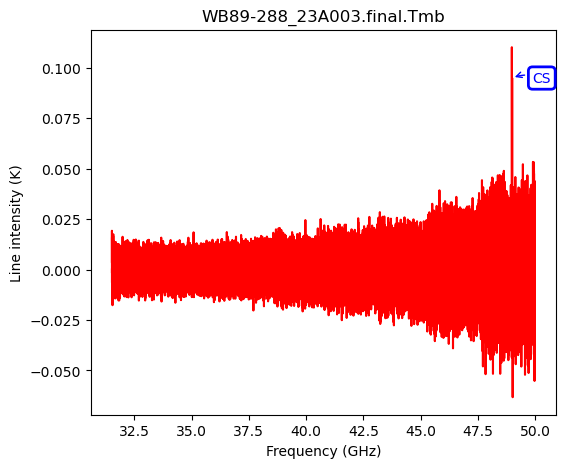

In [98]:
plt.figure(figsize=(6, 5))

peaks, _ = find_peaks(int_array_smooth, height=0.04) 

custom_labels = { # Change the labels with the desired chemical species
    457944: "CS"
}

# Dictionary to hold custom xytext for each label
custom_xytext = {
    457944: (28,5)
}
    
list_freq_of_peak=[]
list_intensity_peak=[]

for peak_index in peaks:
    frequency_of_peak = frequency_array_ghz[peak_index]
    list_freq_of_peak.append(frequency_of_peak)

    intensity_of_peak = int_array_smooth[peak_index]
    list_intensity_peak.append(intensity_of_peak)
    
    label = custom_labels.get(peak_index) 
    
    xytext = custom_xytext.get(peak_index, (5, 5))
    
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=2)
    
    if label:
        arrow_props = dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='blue')
    
        plt.annotate(label, 
                 (frequency_of_peak, intensity_of_peak), 
                 xytext=xytext, 
                 textcoords='offset points', 
                 color='blue', 
                 fontsize=10, 
                 ha='right', 
                 va='top', 
                 bbox=bbox_props, 
                 arrowprops=arrow_props)
    
plt.plot(frequency_array_ghz, int_array_smooth, ls="-", color="red")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Line intensity (K)")
plt.title(f"{name}")

plt.savefig(output_plot_path,dpi=300)

In [21]:
name

'WB89-315_23A003.final.Tmb'

* Table with relevant information of the spectrum:

In [27]:
# Table in Latex format of the relevant information of the spectrum

from tabulate import tabulate

if isinstance(list_freq_of_peak, (int, float)):
    data = [[list_freq_of_peak, list_intensity_peak, chemical_species[0]]]
else:
    data = [[f, i, c] for f, i, c in zip(list_freq_of_peak, list_intensity_peak, chemical_species)]

print(name)
print(tabulate(data, headers=['Frequency (GHz)', 'Line intensity (K)', 'Chemical Species'], tablefmt='latex'))


WB89-315_23A003.final.Tmb
\begin{tabular}{}
\hline
 Frequency (GHz)   & Line intensity (K)   & Chemical Species   \\
\hline
\hline
\end{tabular}
